<a href="https://colab.research.google.com/github/oliviadeckers/lung-cancer-classifier/blob/main/DS2010_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lung Cancer Diagnosis Determination using Machine Learning**

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sns

In [ ]:
dataset = pd.read_csv('./survey lung cancer.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Dataset pulled from kaggle.com
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
dataset['GENDER'] = dataset['GENDER'].map({'M':1,'F':0})
print(dataset['GENDER'])

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64


In [ ]:
dataset['LUNG_CANCER'] = dataset['LUNG_CANCER'].map({'YES':1,'NO':0})

<AxesSubplot:>

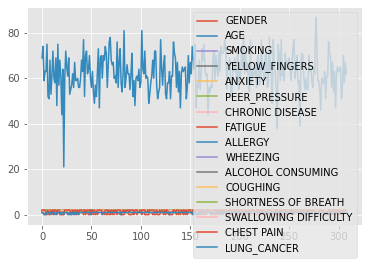

In [ ]:
dataset.plot()

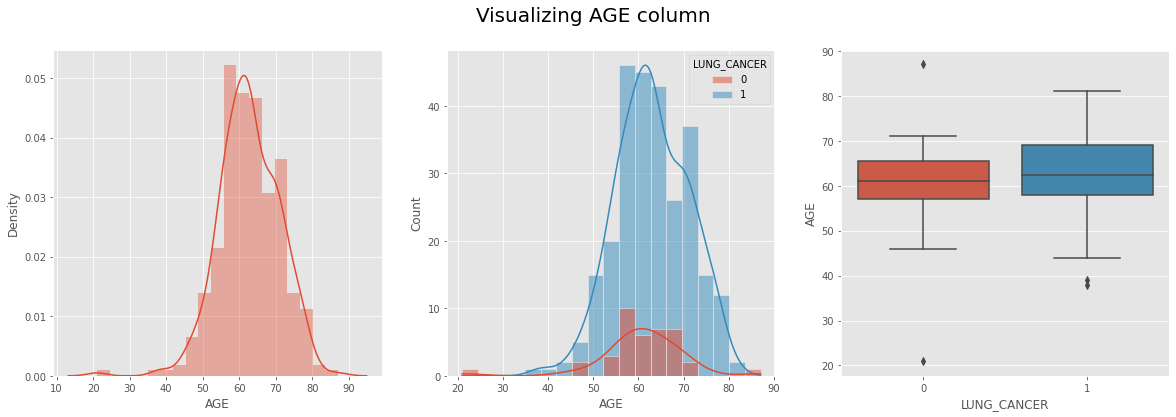

In [ ]:
con_col = ['AGE']
cat_col=[]
for i in dataset.columns:
    if i!='AGE':
        cat_col.append(i)
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(dataset['AGE'],ax=ax[0])
sns.histplot(data =dataset,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=dataset['LUNG_CANCER'],y=dataset['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

In [ ]:
X = dataset.iloc[:,:-1]
y = dataset['LUNG_CANCER']

In [ ]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape, X_test.shape

((247, 15), (62, 15))

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train['AGE'] = X_scaler.transform(X_train)
X_test['AGE'] = X_scaler.transform(X_test)

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model

In [ ]:
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    svclassifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred), kernels[i])

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        54

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62

0.8709677419354839 Polynomial
Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.89      1.00      0.94        54

    accuracy                           0.89        62
   macro avg       0.94      0.56      0.58        62
weighted avg       0.90      0.89      0.85        62

0.8870967741935484 RBF
Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        54

    accuracy                           0.87      

In [ ]:
#KNN
best_accuracy = 0
best_k = 1
models = []
for k in range(24):
  knn_model = KNeighborsClassifier(n_neighbors = k+1)
  knn_model = knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)# Evaluate our model
  accuracy = accuracy_score(y_test, y_pred)
  models.append(accuracy)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_k = k+1

knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("Evaluation:", "KNN,", "k =", best_k)
print(classification_report(y_test,y_pred))

Evaluation: KNN, k = 12
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.98      0.98      0.98        54

    accuracy                           0.97        62
   macro avg       0.93      0.93      0.93        62
weighted avg       0.97      0.97      0.97        62



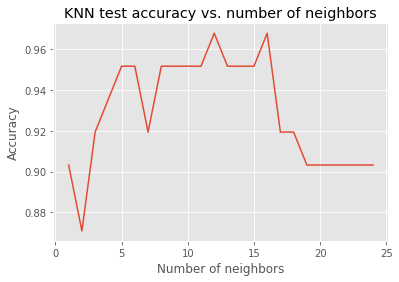

In [ ]:
neighbors = range(1,25)
plt.title('KNN test accuracy vs. number of neighbors')
plt.plot(neighbors, models, label='Testing Accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model_accuracy_score = accuracy_score(y_test, y_pred)
model_accuracy_score

0.967741935483871

In [ ]:
# Decision Trees:
dt1_model = tree.DecisionTreeClassifier(random_state=1)
dt1_model = dt1_model.fit(X_train, y_train)
y_pred = dt1_model.predict(X_test)
print("Evaluation:", "Decision Trees")
print(classification_report(y_test,y_pred))

Evaluation: Decision Trees
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



In [ ]:
model_accuracy_score_dt = accuracy_score(y_test, y_pred)
model_accuracy_score_dt

0.9032258064516129

In [ ]:
# Random Forests:

rf1_model = RandomForestClassifier(n_estimators=50, random_state=1)
rf1_model = rf1_model.fit(X_train, y_train)
y_pred = rf1_model.predict(X_test)
print("Evaluation:", "Random Forests")
print(classification_report(y_test,y_pred))

Evaluation: Random Forests
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [ ]:
model_accuracy_score_rf = accuracy_score(y_test, y_pred)
model_accuracy_score_rf

0.9032258064516129

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [ ]:
for learning_rate in learning_rates:
    svm_model = svm.SVC(kernel='linear', random_state=1, C=learning_rate)
    # Fit the model
    svm_model.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        svm_model.score(
            X_train,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        svm_model.score(
            X_test,
            y_test)))



Learning rate:  0.05
Accuracy score (training): 0.874
Accuracy score (validation): 0.871
Learning rate:  0.1
Accuracy score (training): 0.874
Accuracy score (validation): 0.871
Learning rate:  0.25
Accuracy score (training): 0.939
Accuracy score (validation): 0.952
Learning rate:  0.5
Accuracy score (training): 0.939
Accuracy score (validation): 0.935
Learning rate:  0.75
Accuracy score (training): 0.939
Accuracy score (validation): 0.935
Learning rate:  1
Accuracy score (training): 0.935
Accuracy score (validation): 0.935


<AxesSubplot:>

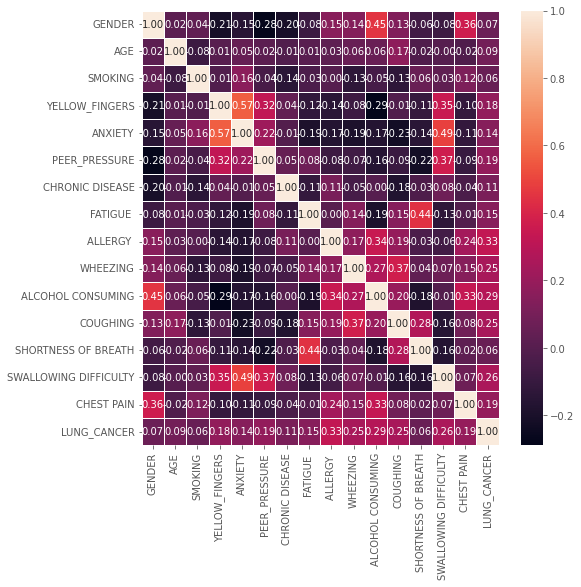

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,fmt='0.2f')

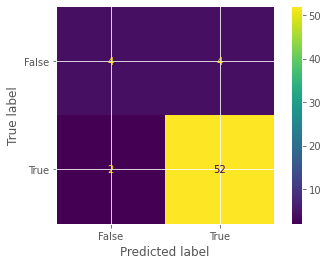

In [ ]:
#Confusion Matrix for SVC

import numpy

actual = y_test
predicted = y_pred

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

import matplotlib.pyplot as plt

cm_display.plot()
plt.show()

In [ ]:
model_importances = pd.DataFrame(rf1_model.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
model_importances

,Importance
ALLERGY,0.098399
FATIGUE,0.095514
ALCOHOL CONSUMING,0.094487
PEER_PRESSURE,0.079821
YELLOW_FINGERS,0.076969
ANXIETY,0.073433
SHORTNESS OF BREATH,0.068762
CHRONIC DISEASE,0.066119
SWALLOWING DIFFICULTY,0.062885
SMOKING,0.056705


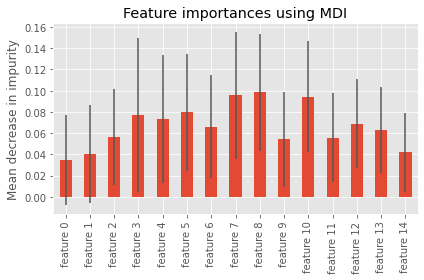

In [ ]:
importances = rf1_model.feature_importances_
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf1_model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
